In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2nearline_histsOnly_AllRuns_24376_24462.root") #processed output of hadd.sh

#check if the directory where we will be saving the images exists
prodString="Run2_24376_24462"
directory = os.path.dirname("./images/"+prodString+"/")
if not os.path.exists(directory):
    print("Creating Image Directory:", directory)
    os.makedirs(directory)
else:
    print("Image Directory", directory,"exists. Continuing.")

Creating Image Directory: ./images/Run2_24376_24462


In [4]:
f.cd("nearlineHistTree/calo1")
f.ls()

TFile**		./data/gm2nearline_histsOnly_AllRuns_24376_24462.root	
 TFile*		./data/gm2nearline_histsOnly_AllRuns_24376_24462.root	
  TDirectoryFile*		nearlineHistTree	nearlineHistTree (CaloNearlineHistograms) folder
   TDirectoryFile*		calo1	calo1
    KEY: TH1D	energy;1	calo 1 energies
    KEY: TH1D	wiggle;1	calo 1 T Method
    KEY: TH1D	times;1	calo 1 hit times
    KEY: TH2D	hitPositions;1	calo 1 hit positions
    KEY: TH2D	nXtalHits;1	calo 1 n xtal hits
    KEY: TH1D	xtal0Energy;1	calo 1 xtal 0 energy
    KEY: TH1D	xtal1Energy;1	calo 1 xtal 1 energy
    KEY: TH1D	xtal2Energy;1	calo 1 xtal 2 energy
    KEY: TH1D	xtal3Energy;1	calo 1 xtal 3 energy
    KEY: TH1D	xtal4Energy;1	calo 1 xtal 4 energy
    KEY: TH1D	xtal5Energy;1	calo 1 xtal 5 energy
    KEY: TH1D	xtal6Energy;1	calo 1 xtal 6 energy
    KEY: TH1D	xtal7Energy;1	calo 1 xtal 7 energy
    KEY: TH1D	xtal8Energy;1	calo 1 xtal 8 energy
    KEY: TH1D	xtal9Energy;1	calo 1 xtal 9 energy
    KEY: TH1D	xtal10Energy;1	calo 1 xtal 10 energy
  

Print all of the embedded histograms.

1,719,155,190 Entries in these histograms
431,460,025 Entries in these histograms
1,719,155,190 Entries in these histograms
272,638,543 Entries in these histograms


Info in <TCanvas::Print>: png file ./images/Run2_24376_24462/Run2_24376_24462_nearlineHistograms.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/Run2_24376_24462/Run2_24376_24462_nearlineHistograms.root has been created


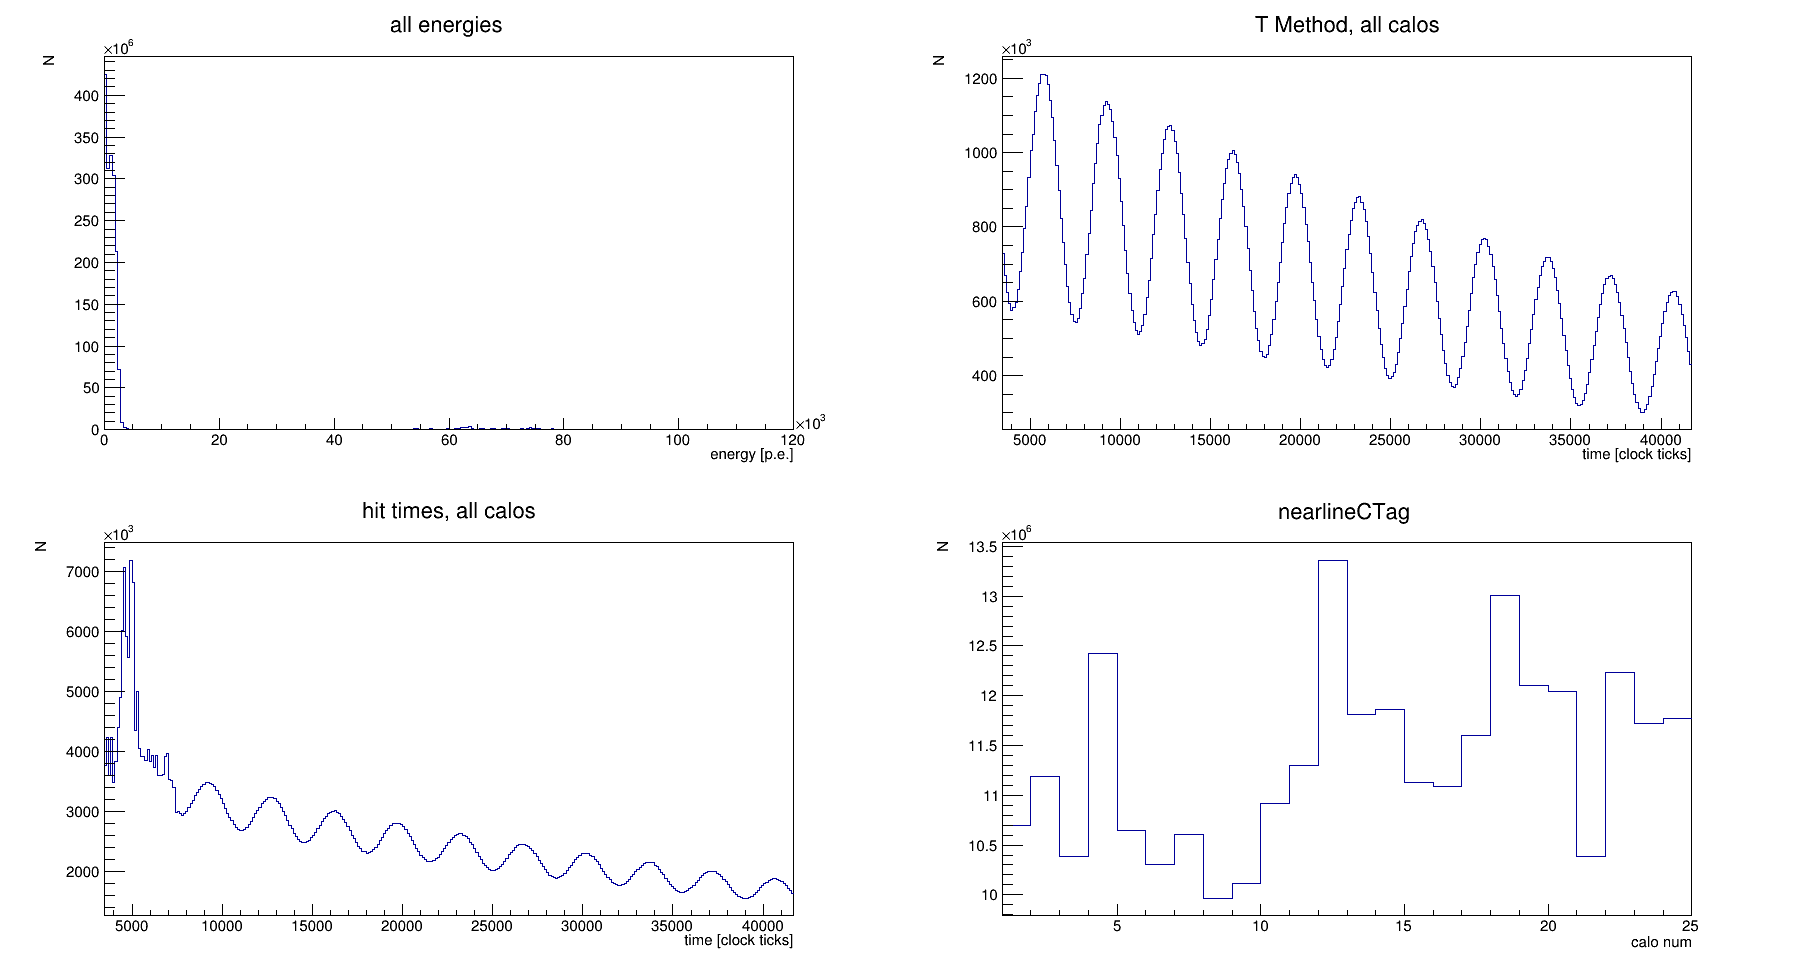

In [5]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = f.Get("nearlineHistTree").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
c.Draw()

c.cd(2)
allCaloWiggle = f.Get("nearlineHistTree").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = f.Get("nearlineHistTree").Get("allCaloTimes").Clone()
allCaloTimes.GetXaxis().SetRange(30,350)
allCaloTimes.Draw()

c.cd(4)
nearlineCTag = f.Get("nearlineHistTree").Get("nearlineCTag").Clone()
nearlineCTag.Draw()

c.Draw()
c.Print("./images/"+prodString+"/"+prodString+"_nearlineHistograms.png")
c.Print("./images/"+prodString+"/"+prodString+"_nearlineHistograms.root")

print("{:,}".format(int(allCaloEnergies.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloWiggle.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloTimes.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(nearlineCTag.GetEntries())), "Entries in these histograms")

# Now lets make a wiggle plot of all of the calos

In [6]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'Run 2 baby! Smells like teen spirit and burning kickers!')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [7]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(700000,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(2000)

### Five parameter fit

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
 FCN=10261.5 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         376 TOTAL
                     EDM=8.2694e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.00905e+06   1.08968e+02  -3.93124e-02  -8.09725e-11
   2  #tau         6.43771e+01   3.92220e-03   1.70619e-06   3.20496e-05
   3  A            3.68208e-01   8.08566e-05   1.76569e-08  -5.16272e-05
   4  R           -7.84463e+01   2.46633e+00   2.94391e-04   1.91738e-07
   5  #phi        -9.76655e-01   4.03886e-04   4.03886e-04  -4.40267e-03
 FCN=10261.5 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         282 TOTAL
                     EDM=4.0188e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


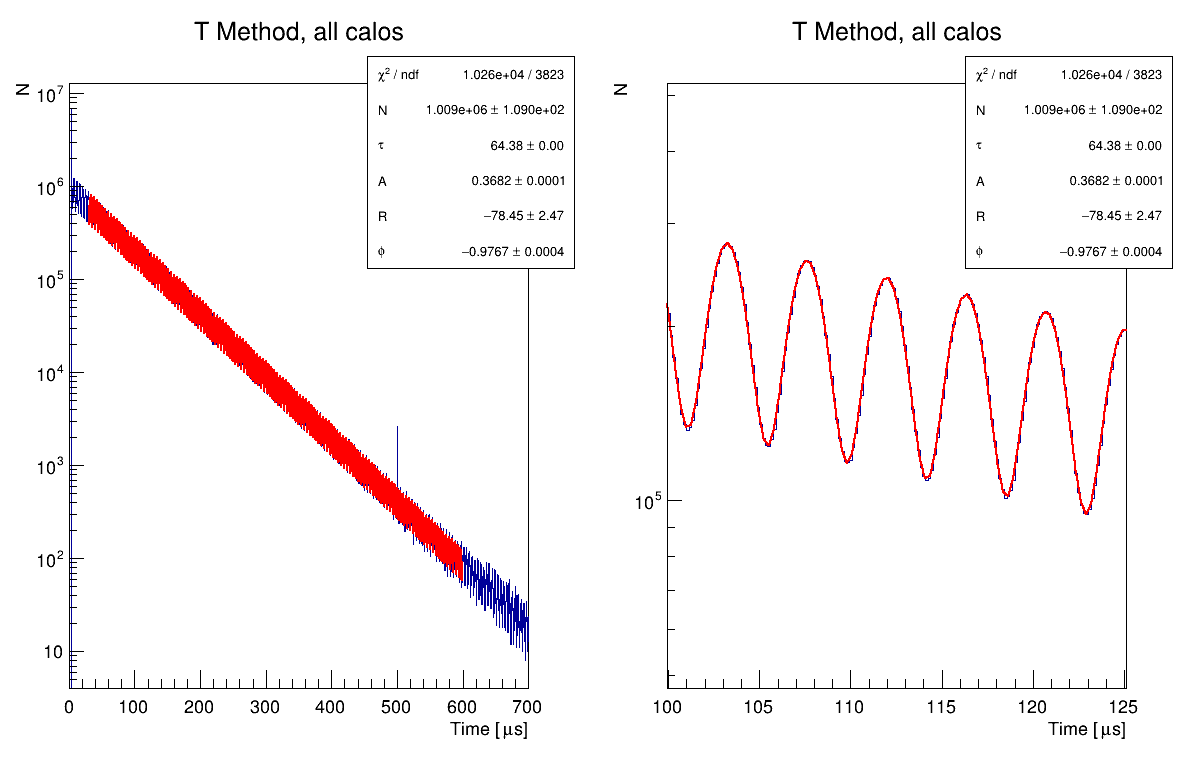

In [9]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("nearlineHistTree").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

for fit in range(2):
    print("Sarting fit:", fit+1)
    allCaloWiggle.Fit("func","REM")

    
chiSqAll = ( ( func.GetNDF(),
              func.GetChisquare(),
              func.GetProb() ) )
    
allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/Run2_24376_24462/Run2_24376_24462_TmethodWiggleFitAllCalos.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/Run2_24376_24462/Run2_24376_24462_TmethodWiggleFitAllCalos.root has been created


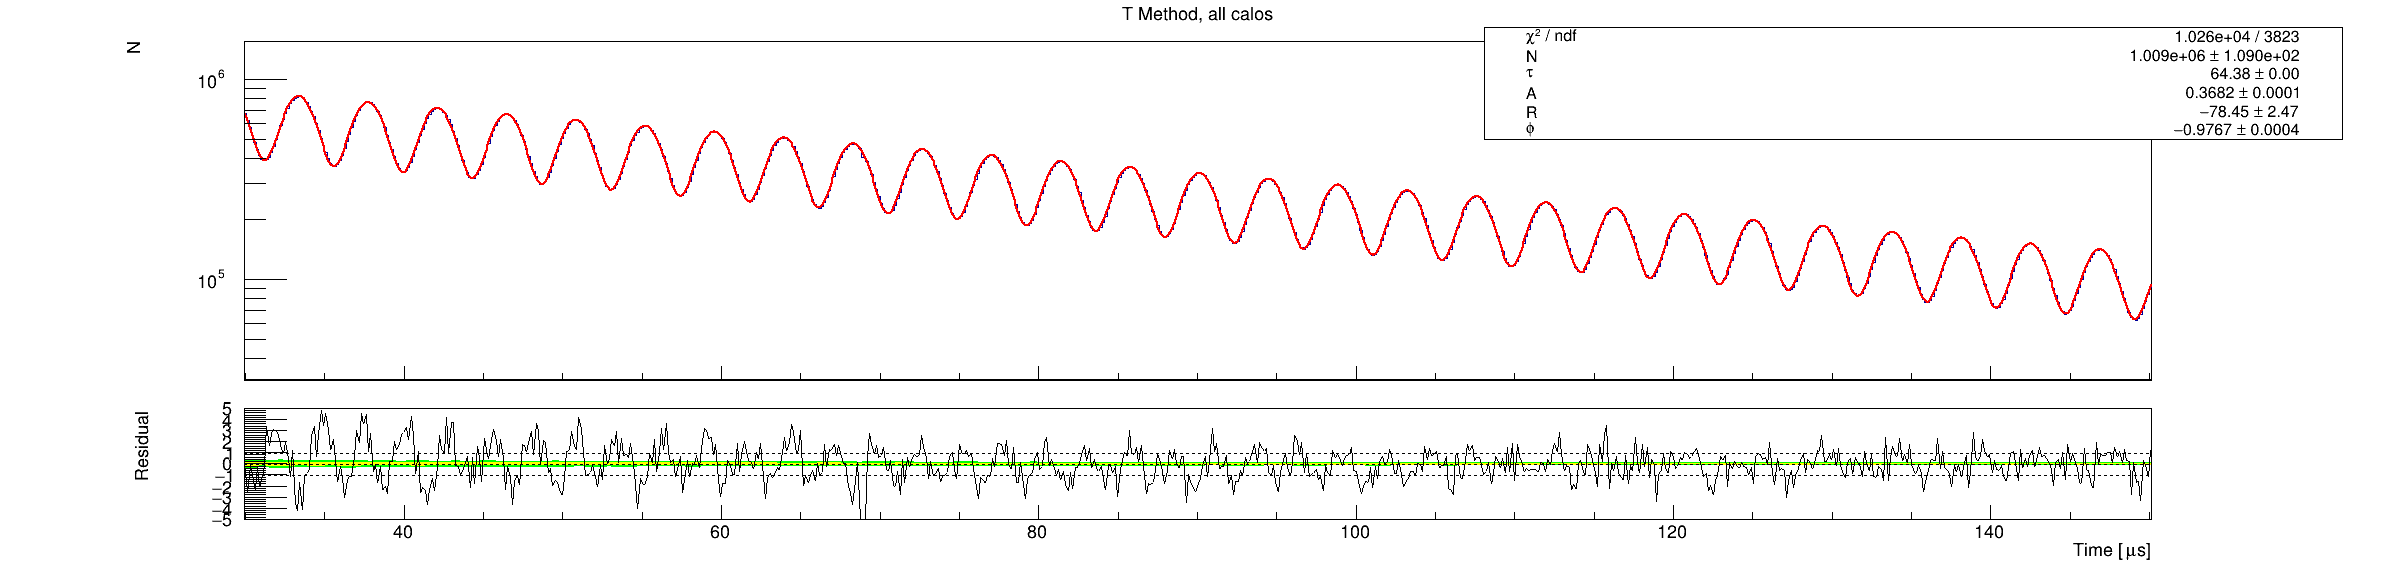

In [14]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas("c","c",2400,600)
allCaloWiggle.Draw()
c3.SetLogy()
c3.Draw()

rp1 = r.TRatioPlot(allCaloWiggle)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-5,5)

allCaloWiggle.GetXaxis().SetRangeUser(30,150)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.png")
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.root")

### Fourier transform of the 5-parameter residuals.

4700
3828 [(30.010638297872337, -586.857291351771), (30.159574468085104, -2026.5739517498296), (30.30851063829787, -68.73649925854988), (30.457446808510635, -764.2248607522342), (30.606382978723403, -1640.2087129061692)]
3828 569.9787234042552 29.93618966628871 599.9149130705439
0.1488972631672558 0.0017544514539549819
13.43208033147934 6.71604016573967


Info in <TCanvas::Print>: png file ./images/Run2_24376_24462/Run2_24376_24462_5ParamResiduals.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/Run2_24376_24462/Run2_24376_24462_5ParamResiduals.root has been created


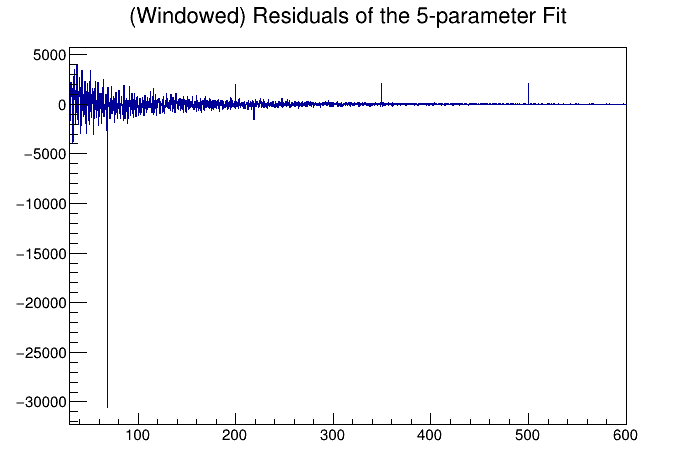

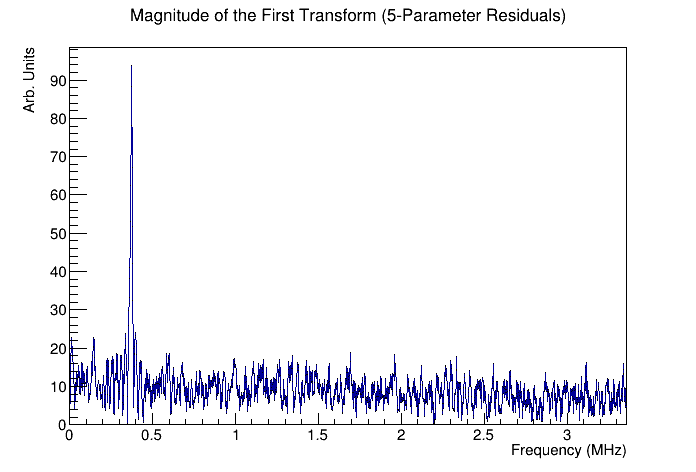

In [15]:
c3 = r.TCanvas()
residuals5param = residuals.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
residVec = []
for i in range(nBins):
    binCenterX = allCaloWiggle.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30 and binCenterX < 600):
        residVec.append( (binCenterX, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX) ) )
        residuals5param.SetBinContent(i, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
residuals5param.Delete()
residuals5param = htest
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

#apply a windows function to try to get rid of the imaginary peaks
welchVec = []
for i in range(nBins):
    unwindowed = residuals5param.GetBinContent(i)
    welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
    welchVec.append(welch)
    residuals5param.SetBinContent(i, unwindowed *  welch)
    
residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,700)
residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
c3.Draw()    
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (5-Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

#c2.SetLogy()
c2.Draw()
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

In [16]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    A2       = p[6]
    A3       = p[7]
    lifeCBO  = p[8]
    omegaCBO = p[9]
    phiCBO1  = p[10]
    phiCBO2  = p[11]
    phiCBO3  = p[12]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1-math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    ACBO = asym * (1 - math.exp(-time/lifeCBO) * A2 * math.cos(omegaCBO*time + phiCBO2))
    phiCBO = phi + math.exp(-time/lifeCBO)*A3*math.cos(omegaCBO*time + phiCBO3)
    
    return norm * math.exp(-time/life) * cCBO * (1 - ACBO*math.cos(omega*time + phiCBO))

In [25]:
func13 = r.TF1("func13", blinded_wiggle_cbo, 30,500,13)
func13.SetParNames('N','#tau','A',
                   'R','#phi','A_{1}',
                   'A_{2}','A_{3}','#tau_{CBO}',
                   '#omega_{CBO}','#phi_{CBO - 1}')
func13.SetParName(11,'#phi_{CBO - 2}')
func13.SetParName(12,'#phi_{CBO - 3}')
func13.SetParLimits(4,-6.3,6.3) #Phases should be restricted to +/- 2Pi
#func13.SetParLimits(8,100,500) #Avoid divide by 0 error
func13.SetParLimits(8,0.0000001,100000000) #Avoid divide by 0 error
func13.SetParLimits(10,-6.3,6.3) 
func13.SetParLimits(11,-6.3,6.3)
func13.SetParLimits(12,-6.3,6.3)

#initial guesses, then updated with the first round of fit results
#func13.SetParameters(1500,64.4,0.4,0,0,1,1,1,.01,.01,0)
#func13.SetParameter(11,0)
#func13.SetParameter(12,0)
func13.SetParameters(100000, 64.32689658986958, -0.41149191856871803, 
                     -11.31981267111425, -4.201648334505292, -0.666502391530784, 
                     0.6927259503578, -0.38908021438317, 220, 
                     4.1, 0.4745581246420292)
func13.SetParameter(11, 6.299934663288357)
func13.SetParameter(12, 0.28579778778899545)
#func13.FixParameter(12,0) #currently this parameter is fixed, as it doesn't behave well if left to wander on its own


func13.SetLineColor(2)
func13.SetNpx(2000)

Starting Fit: 1
Starting Fit: 2
 FCN=1.91372e+07 FROM MIGRAD    STATUS=FAILED       2481 CALLS        2482 TOTAL
                     EDM=3.5718e+10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  12.5 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            9.00359e+05   5.66554e+01   0.00000e+00  -4.13733e+00
   2  #tau         6.57226e+01   2.36982e-03  -0.00000e+00   5.22588e+04
   3  A            1.78822e-02   9.14478e-05   0.00000e+00  -2.61773e+06
   4  R            1.24201e+05   2.09608e+02  -0.00000e+00   3.24421e+00
   5  #phi        -1.20815e+00   9.32158e+00   0.00000e+00  -2.88803e+05
   6  A_{1}        1.64884e+02   2.82773e-01  -0.00000e+00   0.00000e+00
   7  A_{2}       -1.00772e+03   1.41421e+00  -0.00000e+00   0.00000e+00
   8  A_{3}        6.20230e+01   1.41421e+00  -0.00000e+00   0.00000e+00
   9  #tau_{CBO}   2.64640e-01   3.89111e-04  -0.00000e+00** at lim

Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.


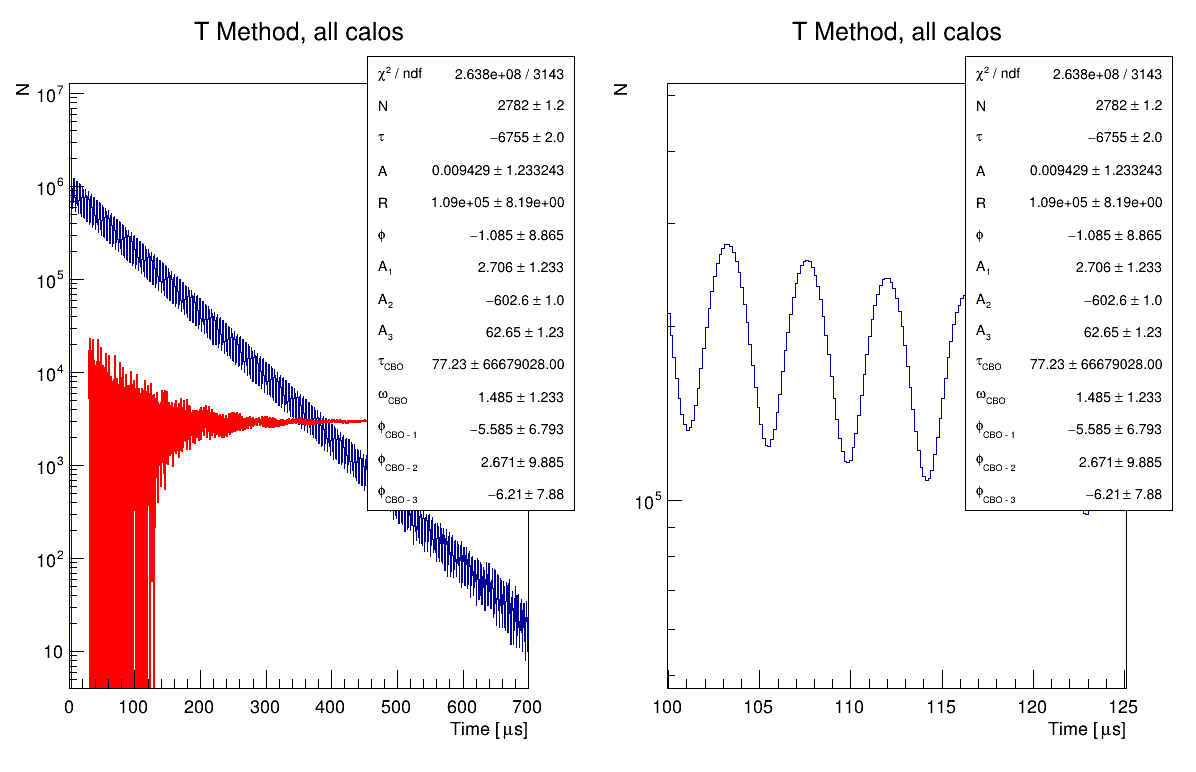

In [26]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle13 = f.Get("nearlineHistTree").Get("allCaloWiggle").Clone()

allCaloWiggle13.GetXaxis().SetLimits(allCaloWiggle13.GetXaxis().GetXmin() / 1000 * 1.25,
                                     allCaloWiggle13.GetXaxis().GetXmax() / 1000 * 1.25)
allCaloWiggle13.GetXaxis().SetTitle("Time [#mus]")

residuals13 = allCaloWiggle13.Clone() # this will be filled with the fit residuals later

for i in range(2): #the fit won't converge the first time. Don't look at me like that!
    print("Starting Fit:",i+1)
    allCaloWiggle13.Fit("func13","REMB")

allCaloWiggle13.Draw()

c2.cd(2)
ding13 =  allCaloWiggle13.Clone()
ding13.GetXaxis().SetRangeUser(100,125)
ding13.Draw()

r.gPad.SetLogy()
c2.Draw()

Error in <TBackCompFitter::GetConfidenceIntervals>: Cannot compute confidence intervals with an invalide fit result
Error in <TBackCompFitter::GetConfidenceIntervals>: Cannot compute confidence intervals with an invalide fit result
Info in <TCanvas::Print>: png file ./images/Run2_24376_24462/Run2_24376_24462_TmethodWiggleFitAllCalos_13Parameter.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/Run2_24376_24462/Run2_24376_24462_TmethodWiggleFitAllCalos_13Parameter.root has been created


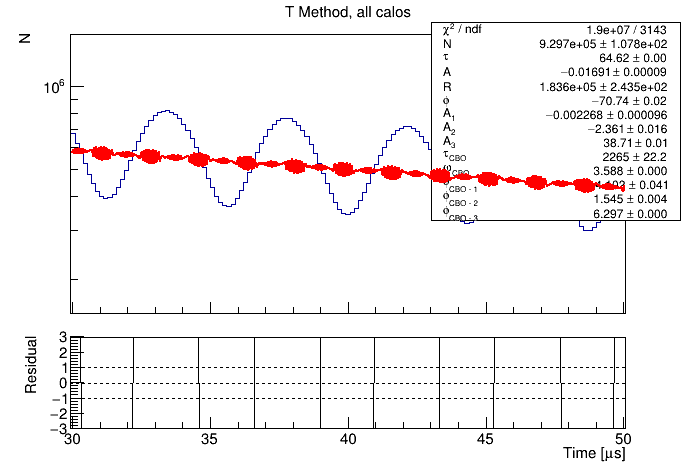

In [23]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas()
allCaloWiggle13.Draw()
c3.SetLogy()
c3.Draw()

rp13 = r.TRatioPlot(allCaloWiggle13)
rp13.Draw()
rp13.GetLowerRefYaxis().SetTitle("Residual")
rp13.GetLowerRefYaxis().SetRangeUser(-3,3)

allCaloWiggle13.GetXaxis().SetRangeUser(30,50)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos_13Parameter.png")
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos_13Parameter.root")

### Fourier xform of the residuals from the 13 parameter fit

4700
0.14893617021276595 wide
4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715


Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Info in <TCanvas::Print>: png file ./images/Run2_24376_24462/Run2_24376_24462_13ParamResiduals.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/Run2_24376_24462/Run2_24376_24462_13ParamResiduals.root has been created


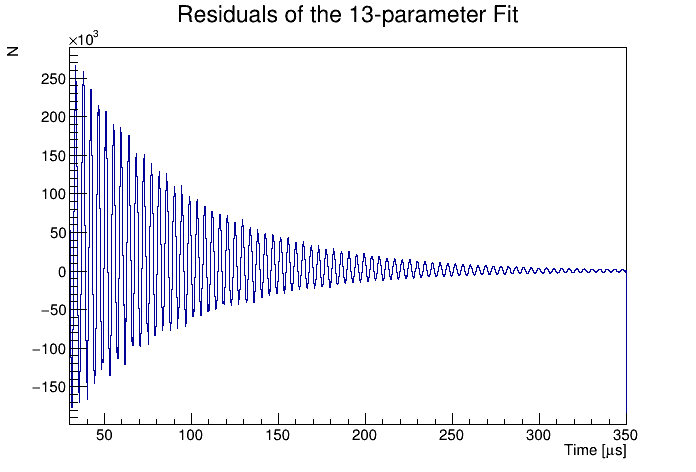

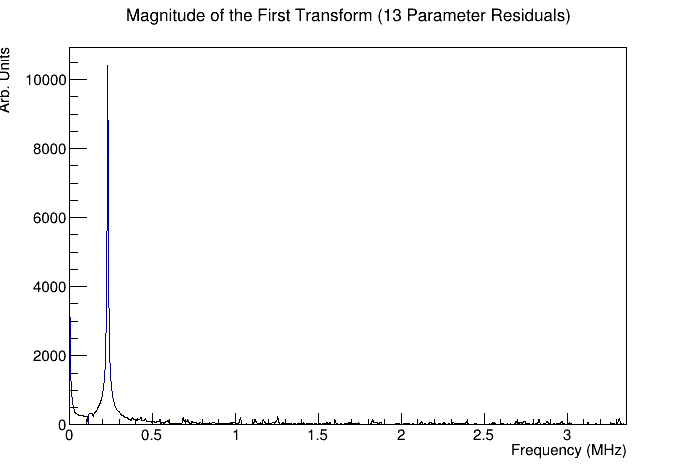

In [24]:
c3 = r.TCanvas()
residuals13param = residuals13.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals13param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
for i in range(nBins):
    binCenterX = allCaloWiggle13.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30):
        residuals13param.SetBinContent(i, allCaloWiggle13.GetBinContent(i) - func13.Eval(binCenterX))
    else:
        residuals13param.SetBinContent(i, 0)

residuals13param.Draw()
residuals13param.GetXaxis().SetRangeUser(30,350)
residuals13param.SetTitle("Residuals of the 13-parameter Fit")
c3.Draw()

print(residuals13param.GetBinWidth(2), "wide")

hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals13param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (13 Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals13param.GetSize() - 2
minBinCenter = residuals13param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals13param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
nbins = residuals13param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)

c2.Draw()
c2.Print("./images/"+prodString+"/"+prodString+"_13ParamResiduals.png")
c2.Print("./images/"+prodString+"/"+prodString+"_13ParamResiduals.root")